In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# printing shape of training dataset
print ('Shape of training dataset:') 
print (x_train.shape)

# printing shape of testing dataset
print ('Shape of testing dataset:')
print (x_test.shape)

Shape of training dataset:
(60000, 28, 28)
Shape of testing dataset:
(10000, 28, 28)


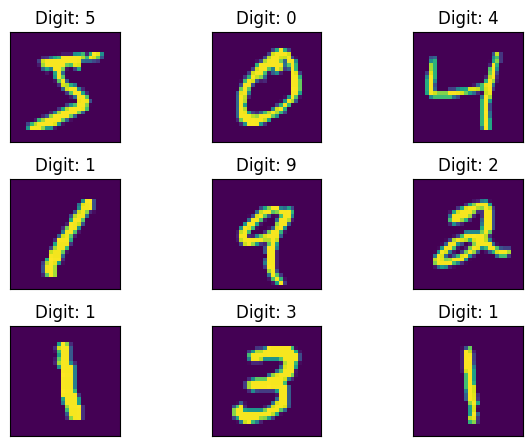

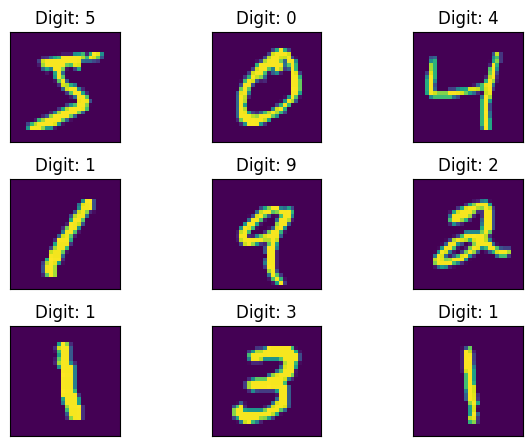

In [4]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [5]:
# Normalize the image pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Reshape the images to include a channel dimension (for CNN input)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 0.1305 - accuracy: 0.9607 - val_loss: 0.0431 - val_accuracy: 0.9857
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.0310 - val_accuracy: 0.9898
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0310 - val_accuracy: 0.9897
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0352 - val_accuracy: 0.9895


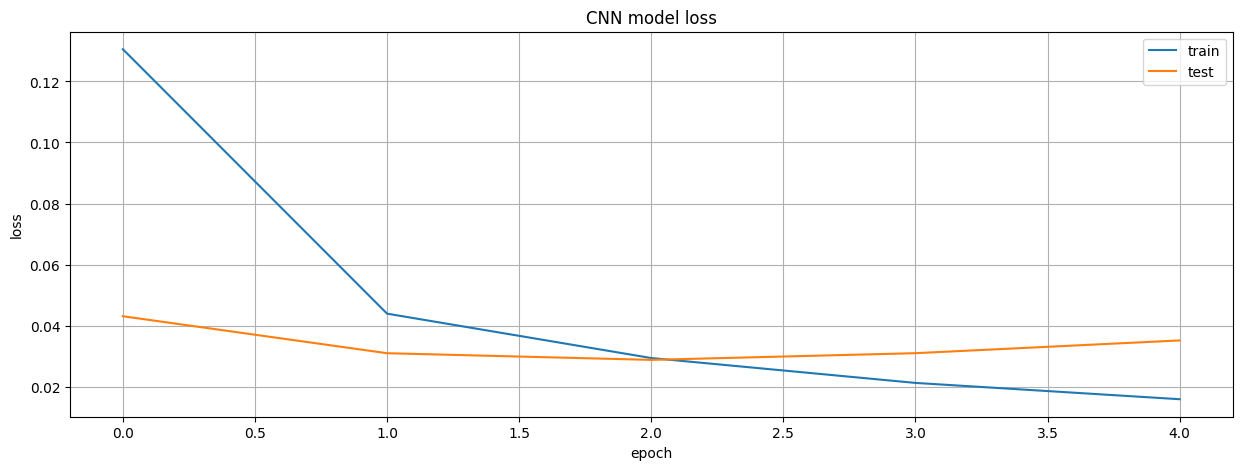

In [10]:
# plotting the metrics
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(111)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('CNN model loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper right')
ax.grid(True)

plt.show()

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0352 - accuracy: 0.9895
Test Loss: 0.035214368253946304
Test Accuracy: 0.9894999861717224
